In [3]:
'''
Train and test an actor critic across the simulated environment.
'''

import Portfolio_Gym
import gym
import numpy as np

import sys
sys.path.append('/Users/jakefowler/Documents/GitHub/rl-portfolio/Stable_Agents')
import A2C_V
import Wrapper

import multiprocessing  as mp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
 99%|█████████▉| 198319/200000 [17:26<00:07, 232.95it/s]

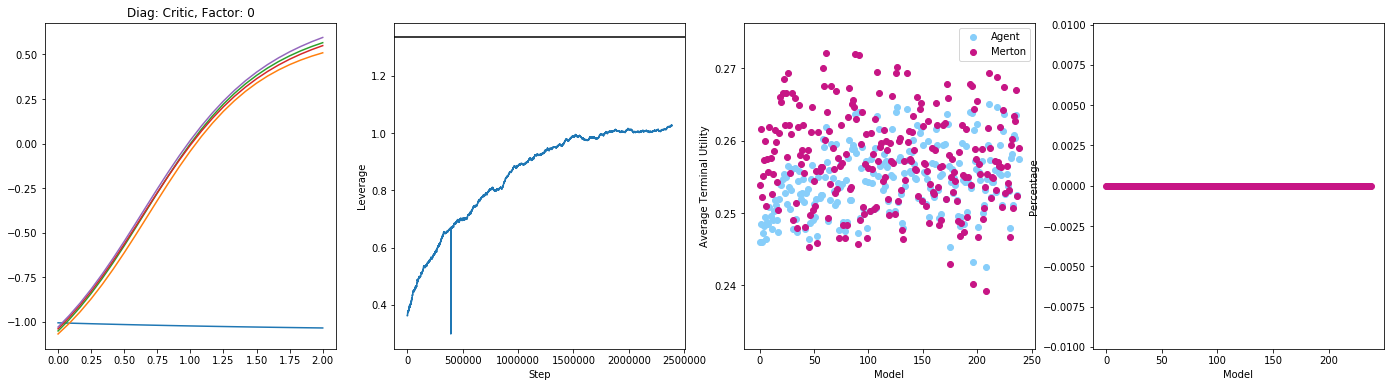

100%|█████████▉| 199320/200000 [17:31<00:02, 238.03it/s]

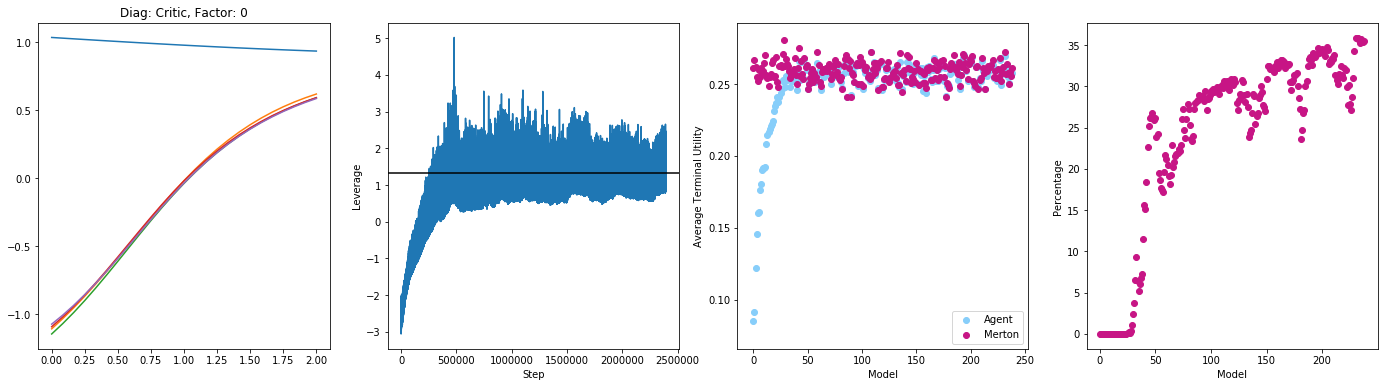

100%|██████████| 200000/200000 [17:35<00:00, 189.46it/s]


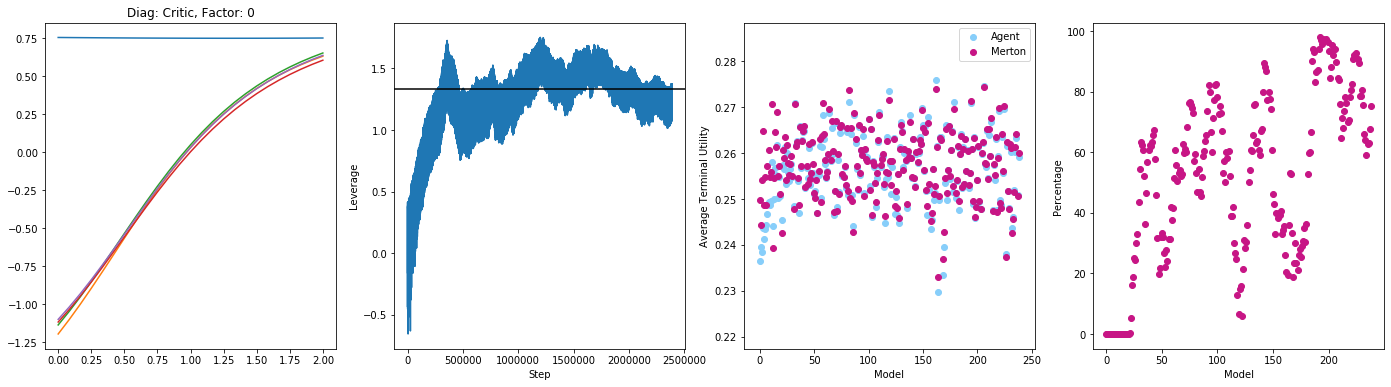

In [2]:
''' Simulated-v0 : Up to N assets, but no explanitory factors. '''

# Model Parameters.
Gamma  = 0.98
N_Eps  = int(2e5)

Actor_Hypers   = {"Learning Rate" : 0.05,
                  "Epoch"         : 1,
                  "Network Size"  : [4,4],
                  "Activation"    : "Relu",
                  "Alpha"         : 0.05}

Critic_Hypers = {"Learning Rate" : 0.05,
                 "Epoch"         : 10,
                 "Network Size"  : [4,4],
                 "Activation"    : "Sigmoid",
                 "Alpha"         : 0.1}


# Function to facilitate mulitprocessing.
def Run(seed):
    np.random.seed(seed)
    Env = gym.make('Simulated-v0')
    Env.Set_Params(Max_Leverage = 100, Min_Leverage = -100)
    
    myAC = A2C_V.Actor_Critic(Env, Actor_Hypers, Critic_Hypers, Gamma = 0.98, Sigma_Range = [2, 0.4], Sigma_Anneal = 1, Retrain_Frequency = 20)
    
    myWrapper = Wrapper.Wrapper(myAC)
    myWrapper.Train(N_Eps, Plot = ['Mu', 'Merton_Benchmark', 'Percent_Merton_Action'], Diagnostics = [{'Module' : 'Critic', 'Factor' : 0}])
    
    return myWrapper

# Run the investigation...
with mp.Pool(mp.cpu_count()) as pool:
    myWrappers = pool.map(Run, np.random.randint(0, int(1e9), 3))


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


1.4714193470162744
[0.01180065] [0.00801991]


  0%|          | 0/100000 [00:00<?, ?it/s]

1.5745821721828297
[0.01285112] [0.00816161]


  0%|          | 15/100000 [00:00<11:13, 148.45it/s]

1.4555011501637456
[0.01160733] [0.0079748]


100%|█████████▉| 99531/100000 [16:03<00:04, 103.72it/s]

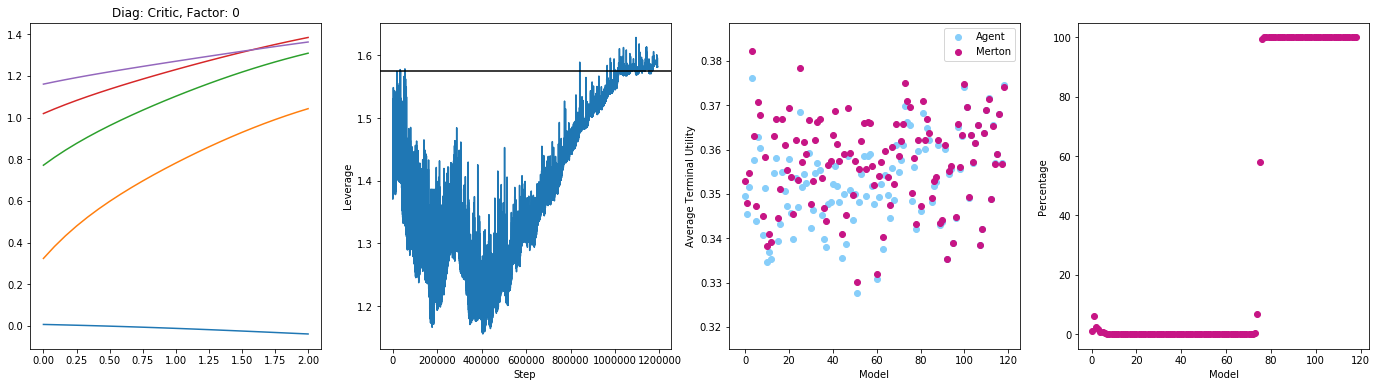

100%|██████████| 100000/100000 [16:07<00:00, 103.36it/s]


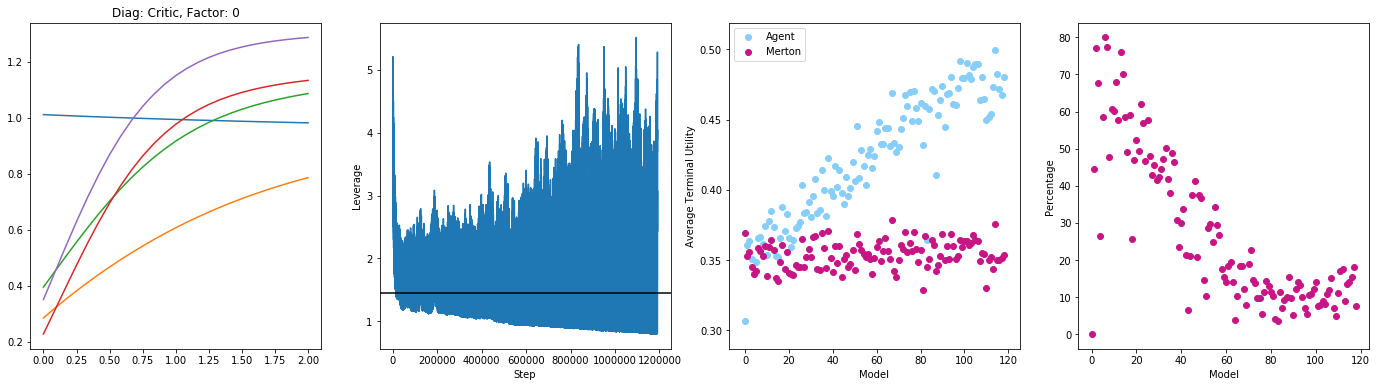

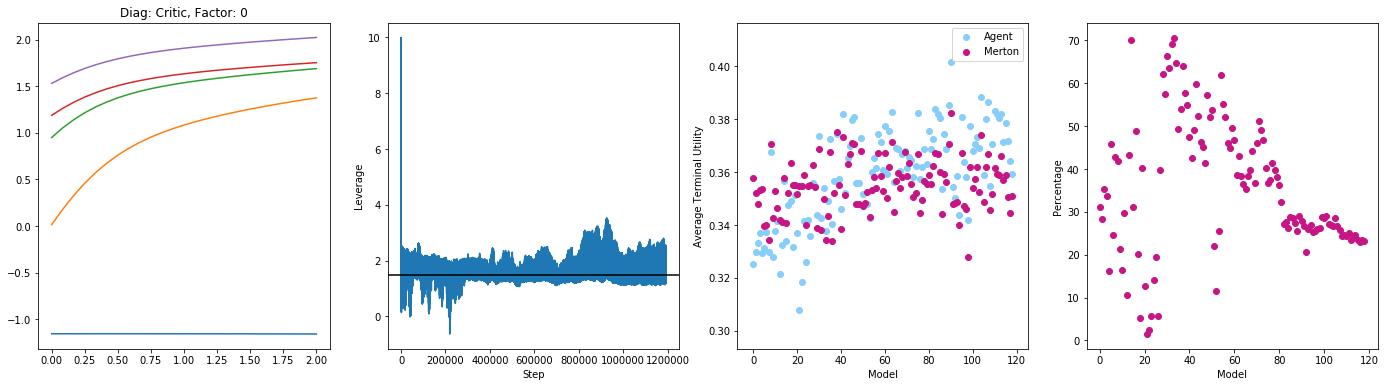

In [6]:
''' Simulated-v1 : Up to N assets, and up to M factors. Here using one asset and one factor with heavy corrolation to aid the AC in its solution '''

# Model Parameters.
Gamma  = 0.98
N_Eps  = int(1e5)

Actor_Hypers   = {"Learning Rate" : 0.05,
                  "Epoch"         : 1,
                  "Network Size"  : [4,4],
                  "Activation"    : "Relu",
                  "Alpha"         : 0.05}

Critic_Hypers = {"Learning Rate" : 0.05,
                 "Epoch"         : 10,
                 "Network Size"  : [4,4],
                 "Activation"    : "Sigmoid",
                 "Alpha"         : 0.1}


# Single asset single factor with high R2
Factor_Beta = np.array([-0.1694, 0.9514]).reshape(-1,1)
Asset_Beta  = np.array([0.5549, 0.1568]).reshape(-1,1)
Cov         = np.array([[6.225, -6.044], [-6.044, 6.316]]) * 1e-3


# Brandt Parameters
# Factor_Beta = np.array([-0.1694, 0.9514]).reshape(-1,1)
# Asset_Beta  = np.array([0.2049, 0.0568]).reshape(-1,1)
# Cov         = np.array([[6.225, -6.044], [-6.044, 6.316]]) * 1e-3



# Function to facilitate mulitprocessing.
def Run(seed):
    np.random.seed(seed)
    Env = gym.make('Simulated-v1')
    Env.Set_Params(Factor_Beta = Factor_Beta, Asset_Beta = Asset_Beta, Cov = Cov, Period = 0.25, Max_Leverage = 100, Min_Leverage = -100)

    print(Env.Training_Merton)
    print(Env.Training_Mean, Env.Training_Var)
    
    myAC = A2C_V.Actor_Critic(Env, Actor_Hypers, Critic_Hypers, Gamma = 0.98, Sigma_Range = [2, 0.4], Sigma_Anneal = 1, Retrain_Frequency = 20)
    
    myWrapper = Wrapper.Wrapper(myAC)
    myWrapper.Train(N_Eps, Plot = ['Mu', 'Merton_Benchmark', 'Percent_Merton_Action'], Diagnostics = [{'Module' : 'Critic', 'Factor' : 0}])
    
    return myWrapper

# Run the investigation...
with mp.Pool(mp.cpu_count()) as pool:
    myWrappers = pool.map(Run, np.random.randint(0, int(1e9), 3))
